In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt    
from numpy import *
import subprocess
import scipy.constants as sc

In [3]:
subprocess.check_output("bash job.sh", shell=True, cwd="./frenkel_ladd")

b'Running T = 100K simulation.\nRunning T = 400K simulation.\nRunning T = 700K simulation.\nRunning T = 1000K simulation.\nRunning T = 1300K simulation.\nRunning T = 1600K simulation.\n'

In [4]:
# Input parameters.
T = array([100,400,700,1000,1300,1600]) # [K].
a = array([2.8841,2.9115,2.9315,2.9484,2.9637,2.9782]) # [A].
k = array([5.787,4.866,4.073,3.373,2.799,2.443]) # [eV/A^2].
m = 55.845 # Iron mass [g/mol].
natoms = 250 # Number of atoms.

In [5]:
# Physical constants.
kB = sc.value('Boltzmann constant in eV/K')
eV = sc.value('electron volt')
hbar = sc.value('Planck constant over 2 pi in eV s')
mu = sc.value('atomic mass constant')

In [6]:
################################################################################
# Lambda integration [Eq.(12) in the paper].
################################################################################

W = zeros(len(T)) # Reversible work for each temperature.
for i in range(len(T)):
    # Forward integration.
    dE, lamb = loadtxt('./frenkel_ladd/data/forward_%dK.dat' % T[i], unpack=True)
    I_forw = trapz(dE,lamb)
    # Backward integration.
    dE, lamb = loadtxt('./frenkel_ladd/data/backward_%dK.dat' % T[i], unpack=True)
    I_back = trapz(dE,lamb)
    # Compute reversible work.
    W[i] = (I_forw-I_back) / 2

In [7]:
################################################################################
# Compute free energy.
################################################################################

# Define harmonic reference system free energy [Eq.(15) in the paper].
omega = sqrt(k*eV/(m*mu)) * 1.0e+10 # [1/s].
F_harm = 3*natoms*kB*T * log(hbar*omega/(kB*T)) # [eV].

# Fixed center of mass correction [Eq.(24) in the paper].
V = (a**3/2) * natoms # Total volume.
F_CM = (kB*T)*log((natoms/V) * (2*pi*kB*T / (natoms*m*omega**2))**(3/2)) # [eV].

# Compute absolute free energy per atom [Eq.(16) in the paper] and save data.
F = (F_harm + W + F_CM) / natoms # [eV/atom].
savetxt('./frenkel_ladd/data/free_energy.dat', transpose([T,F]),
        header='T [K] F [eV/atom]', fmt='%4d %.4f')

################################################################################



In [8]:
c = ['#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00','#FFFF33','#A65628','#F781BF','#999999']

In [9]:
################################################################################
# Load data.                                                                   #
################################################################################

T, F = loadtxt('./frenkel_ladd/data/free_energy.dat', unpack=True)

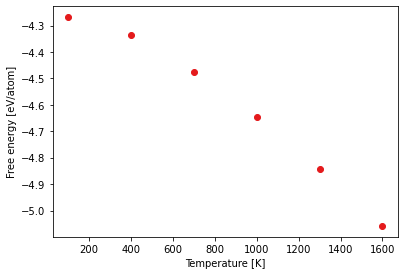

In [10]:
################################################################################
# Plot.                                                                        #
################################################################################

# Start figure.
fig = plt.figure()
ax = fig.add_axes([0.15,0.15,0.80,0.80])

# Plot.
ax.plot(T, F, 'o', c=c[0], lw=1)
 
# Add details and save figure.
ax.set_xlabel(r'Temperature [K]')
ax.set_ylabel(r'Free energy [eV/atom]')
fig.savefig("fig_free_energy_vs_temperature.png", dpi=300)
################################################################################

